<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Проект:-Предсказание-стоимости-жилья" data-toc-modified-id="Проект:-Предсказание-стоимости-жилья-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Проект: Предсказание стоимости жилья</a></span></li><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Инициализация-Spark-сессии" data-toc-modified-id="Инициализация-Spark-сессии-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Инициализация Spark-сессии</a></span></li><li><span><a href="#Чтение-содержимое-файла" data-toc-modified-id="Чтение-содержимое-файла-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чтение содержимое файла</a></span></li><li><span><a href="#Ознакомление-и-предобработка-данных" data-toc-modified-id="Ознакомление-и-предобработка-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Ознакомление и предобработка данных</a></span></li><li><span><a href="#Матрица-корреляции" data-toc-modified-id="Матрица-корреляции-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Матрица корреляции</a></span></li><li><span><a href="#Проверка-на-дубликаты" data-toc-modified-id="Проверка-на-дубликаты-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Проверка на дубликаты</a></span></li><li><span><a href="#Построение-моделей" data-toc-modified-id="Построение-моделей-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Построение моделей</a></span></li><li><span><a href="#Сравнение-результатов-работы-линейной-регрессии-на-двух-наборах-данных-по-метрикам-RMSE,-MAE-и-R2" data-toc-modified-id="Сравнение-результатов-работы-линейной-регрессии-на-двух-наборах-данных-по-метрикам-RMSE,-MAE-и-R2-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Сравнение результатов работы линейной регрессии на двух наборах данных по метрикам RMSE, MAE и R2</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Проект: Предсказание стоимости жилья

**Описание:**

   В проекте нам нужно обучить модель линейной регрессии на данных о жилье в Калифорнии в 1990 году. На основе данных нужно предсказать медианную стоимость дома в жилом массиве. Обучите модель и сделайте предсказания на тестовой выборке. Для оценки качества модели используем метрики RMSE, MAE и R2.
   
**Данные:**

* `longitude` — широта;
* `latitude` — долгота;
* `housing_median_age` — медианный возраст жителей жилого массива;
* `total_rooms` — общее количество комнат в домах жилого массива;
* `total_bedrooms` — общее количество спален в домах жилого массива;
* `population` — количество человек, которые проживают в жилом массиве;
* `households` — количество домовладений в жилом массиве;
* `median_income` — медианный доход жителей жилого массива;
* `median_house_value` — медианная стоимость дома в жилом массиве;
* `ocean_proximity` — близость к океану.

**Цели:**

* Постройте двух модели линейной регрессии (обученной на всех данных и только на числовых данных) для предсказания медианной стоимости дома в жилом массиве.
* Сравнение результатов работы линейной регрессии на двух наборах данных по метрикам RMSE, MAE и R2.

**Структура проекта:**
 1. Импорт библиотек.
 2. Инициализация Spark-сессии.
 3. Чтение содержимое файла.
 4. Ознакомление и предобработка данных.
 5. Построение моделей.
 6. Сравнение результатов работы моделей.
 7. Вывод.
 
**Предмет исследования:**
* Данных о жилье в Калифорнии в 1990 году.
    
**Методы:** которые мы применим в данном исследовании:
* Загрузка и ознакомление с данными
* Работа с пропусками
* Pipeline
* Cross-validation
* Model tuning


**Используемые библитеки:** 
 * Pandas
 * Numpy
 * Pyspark
 * Matplotlib
 * Seaborn

## Импорт библиотек

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyspark
import pyspark.pandas as ps
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F
from pyspark.sql.functions import isnan, when, count, col
from pyspark.ml import Pipeline
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import Imputer
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import StringIndexer 
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import HashingTF
from pyspark.ml.stat import Correlation
import seaborn as sns

STUDY = False
SEED = 1234

ModuleNotFoundError: No module named 'pyspark.pandas'

## Инициализация Spark-сессии
    Инициализируем локальную spark-сессию:

In [2]:
#  Инициализация локальной spark-сессии
spark = SparkSession.builder \
                    .master("local") \
                    .appName("EDA California Housing") \
                    .getOrCreate()

## Чтение содержимое файла
    Прочитаем данные:

In [3]:
#  Чтение содержимое файла
df = spark.read.option('header', 'true').csv('/datasets/housing.csv', inferSchema = True) 

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>
    
✔️ Хорошо, что ты сразу прописываешь подгрузку информации о типах признаков в загрузке данных, это освобождает от необходимости приводить к нужному типу.
</div> 

## Ознакомление и предобработка данных
    Взглянем на первые строки датасета:

In [4]:
  # Вывод первых строк датасета
df.show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|     1274.0|         235.0|     558.0|     219.0|       5.6431|          341300.0|       NEAR BAY|
|  -122.25|   37.85|              

In [5]:
  #Типы данных
df.dtypes

[('longitude', 'double'),
 ('latitude', 'double'),
 ('housing_median_age', 'double'),
 ('total_rooms', 'double'),
 ('total_bedrooms', 'double'),
 ('population', 'double'),
 ('households', 'double'),
 ('median_income', 'double'),
 ('median_house_value', 'double'),
 ('ocean_proximity', 'string')]

In [6]:
  #Пропущенные значения
na_list = [None, np.nan]
df.select([count(when((isnan(c)) | col(c).isNull() | col(c).isin(na_list), c)).alias(c) for c in df.columns]).show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|        0|       0|                 0|          0|           207|         0|         0|            0|                 0|              0|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+



207 знчений в столбце `total_bedrooms` пропущенны, заполнять будем медианным значением при помощи Imputer'а на этапе сборки Pipline'на.

In [ ]:
def irq_filtration(columns_list, data):
    for target_column in columns_list:
        first_len = len(data)
        Q1 = data[target_column].quantile(0.25)
        Q3 = data[target_column].quantile(0.75)
        IQR = Q3 - Q1
        Lower_Fence = Q1 - (1.5 * IQR)
        Upper_Fence = Q3 + (1.5 * IQR)
        data = data.loc[(Lower_Fence <= data[target_column]) & (data[target_column] <=  Upper_Fence) & ()]
        print(f'В колонке {target_column} отфильтровано {len(data) - first_len} строк')
    return data

In [21]:
import pyspark.pandas as ps
ps.Series(df.select('housing_median_age'))

ModuleNotFoundError: No module named 'pyspark.pandas'

## Матрица корреляции

23/01/21 19:47:41 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
23/01/21 19:47:41 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


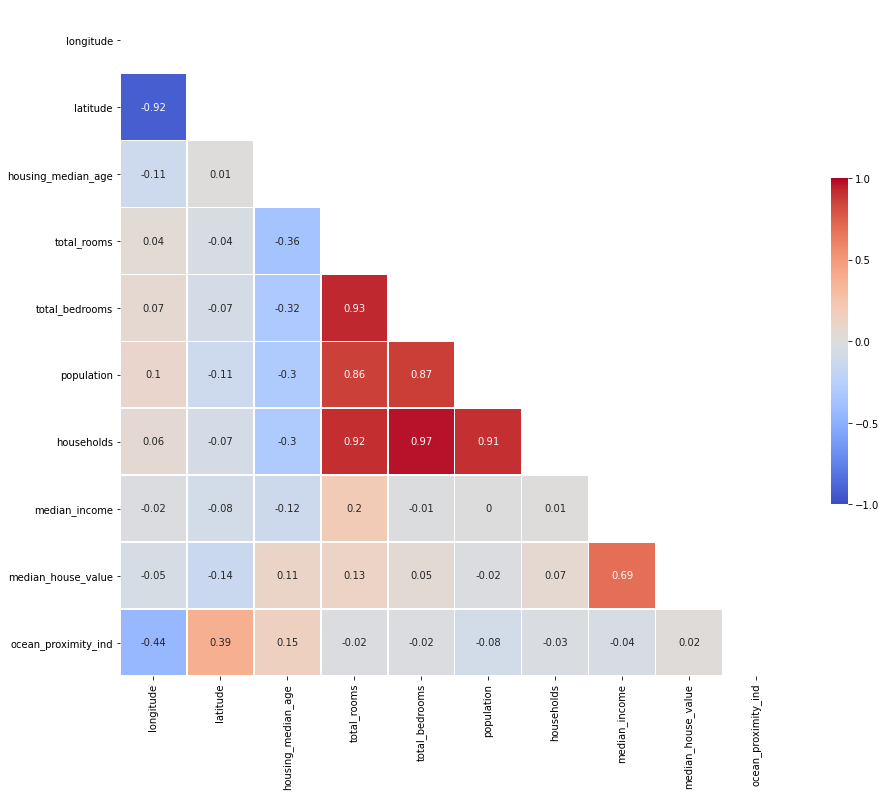

In [7]:
columns_list = ['longitude',
                'latitude',
                'housing_median_age',
                'total_rooms',
                'total_bedrooms',
                'population',
                'households',
                'median_income',
                'median_house_value',
                'ocean_proximity_ind']
vector_col = "corr_features"

indexer = StringIndexer(inputCol="ocean_proximity", outputCol="ocean_proximity_ind")
indexed = indexer.fit(df).transform(df)

numericalimputer = Imputer(inputCols=['total_bedrooms'], outputCols=['total_bedrooms'])
indexed_imputer  = numericalimputer.fit(indexed).transform(indexed)

assembler = VectorAssembler(inputCols=columns_list, outputCol=vector_col)
df_vector = assembler.transform(indexed_imputer)


matrix = Correlation.corr(df_vector, vector_col).collect()[0][0].toArray()

m = matrix
m[np.triu_indices(m.shape[0], 0)] = None

corr_matrix = m.tolist() 
corr_matrix_df = pd.DataFrame(data=corr_matrix, columns = columns_list, index=columns_list) 

labels = corr_matrix_df.columns.values
mask = np.triu(np.ones_like(corr_matrix_df, dtype=np.bool_))

f, ax = plt.subplots(figsize=(15, 15)) 
heatmap = sns.heatmap(round(corr_matrix_df, 2), 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 10})


sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [8]:
df.describe().toPandas()

,summary,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,count,20640,20640,20640,20640,20433,20640,20640,20640,20640,20640
1,mean,-119.56970445736148,35.6318614341087,28.639486434108527,2635.7630813953488,537.8705525375618,1425.4767441860465,499.5396802325581,3.8706710029070246,206855.81690891474,None
2,stddev,2.003531723502584,2.135952397457101,12.58555761211163,2181.6152515827944,421.38507007403115,1132.46212176534,382.3297528316098,1.899821717945263,115395.61587441359,None
3,min,-124.35,32.54,1.0,2.0,1.0,3.0,1.0,0.4999,14999.0,<1H OCEAN
4,max,-114.31,41.95,52.0,39320.0,6445.0,35682.0,6082.0,15.0001,500001.0,NEAR OCEAN


## Проверка на дубликаты

In [9]:
print("Уникальных строк: " + str(df.distinct().count()) + ' из ' + str(df.count()))

Уникальных строк: 20640 из 20640


## Построение моделей

В нашем распоряжении 8 числовых признаков, один категориальный и целевое значение:

In [10]:
categorical_cols = ['ocean_proximity']
numerical_cols  = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
                  'population', 'households', 'median_income']
target = 'median_house_value'
score_dict = {}

In [11]:
data_sets = ['num_data', 'all_data']
train_data, test_data = df.randomSplit([.8,.2], seed=SEED)

for data_type in data_sets:
    
    #  Шаги по обработке числовых значений
    numericalimputer = Imputer(inputCols=numerical_cols,
                  outputCols=numerical_cols)

    numerical_assembler = VectorAssembler(inputCols=numerical_cols,
                                      outputCol="numerical_features")

    numerical_standardScaler = StandardScaler(inputCol='numerical_features',
                                          outputCol="numerical_features_scaled")
    
    if data_type == 'all_data':

        #  Шаги по обработке категориальных значений
        categorical_indexer = StringIndexer(inputCols=categorical_cols, 
                        outputCols=[c+'_idx' for c in categorical_cols])

        categorical_encoder = OneHotEncoder(inputCols=[c+'_idx' for c in categorical_cols],
                        outputCols=[c+'_ohe' for c in categorical_cols])

        categorical_assembler = VectorAssembler(inputCols=[c+'_ohe' for c in categorical_cols],
                                        outputCol="categorical_features")


        #  Финальная сборка
        all_features = ['categorical_features', 'numerical_features_scaled']
    elif data_type == 'num_data':
        all_features = ['numerical_features_scaled']

    final_assembler = VectorAssembler(inputCols=all_features, 
                                  outputCol="all_features") 
    
    #  Модель
    model = LinearRegression()
    
    if data_type == 'all_data':
        #  Пайплайн
        pipeline = Pipeline(stages=[categorical_indexer,
                            categorical_encoder,
                            categorical_assembler,
                            numericalimputer,
                            numerical_assembler,
                            numerical_standardScaler,
                            final_assembler, 
                            model])
    elif data_type == 'num_data':
        pipeline = Pipeline(stages=[
                            numericalimputer,
                            numerical_assembler,
                            numerical_standardScaler,
                            final_assembler, 
                            model])
    #  Решетка параметров
    if STUDY:
        paramGrid = (ParamGridBuilder()
        .addGrid(numericalimputer.strategy, ['median'])     
        .addGrid(model.labelCol, [target])
        .addGrid(model.featuresCol, ["all_features"])
        .addGrid(model.regParam, [0.001, 0.01, 0.1, 0.5, 1.0, 2.0])
        .addGrid(model.elasticNetParam, [0.0, 0.25, 0.5, 0.75, 1.0])
        .addGrid(model.maxIter, [1, 5, 10, 20, 50])
        .build())
    else:
        paramGrid = (ParamGridBuilder()
        .addGrid(numericalimputer.strategy, ['median'])     
        .addGrid(model.labelCol, [target])
        .addGrid(model.featuresCol, ["all_features"])
        .addGrid(model.regParam, [2.0])
        .build())

    #  Оценшик 
    lrevaluator = RegressionEvaluator(predictionCol="prediction", 
                                  labelCol=target, 
                                  metricName="rmse")
    #  Крос-валидация
    lrcv = CrossValidator(estimator=pipeline,
                      estimatorParamMaps=paramGrid,
                      evaluator=lrevaluator,
                      numFolds=5)

    #  Обучение
    lrcvModel = lrcv.fit(train_data)


    #  Метрики
    if data_type == 'all_data':
        print("Модель " , lrcvModel.bestModel.stages[-1] , "при использовании всех данных получила\
         следующие метрики:")
    elif data_type == 'num_data':
        print("Модель " , lrcvModel.bestModel.stages[-1] , "при использовании числовых данных получила\
         следующие метрики:")

    lrcvSummary = lrcvModel.bestModel.stages[-1].summary
    RMSE = str(lrcvSummary.rootMeanSquaredError)
    MAE = str(lrcvSummary.meanAbsoluteError)
    R2 = str(lrcvSummary.r2)

    print("RMSE: " + RMSE)
    print("MAE: " + MAE)
    print("R2: " + R2)

    print("С параметрами:")
    print("tMaxIter: ", lrcvModel.bestModel.stages[-1].getMaxIter())
    print("ElasticNetParam: ", lrcvModel.bestModel.stages[-1].getElasticNetParam())
    print("RegParam: ", lrcvModel.bestModel.stages[-1].getRegParam())
    
    if data_type == 'all_data':
        score_dict['full_data'] = [RMSE, MAE, R2]
    elif data_type == 'num_data':
        score_dict['only_num_data'] = [RMSE, MAE, R2]

23/01/21 19:47:59 WARN LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeSystemLAPACK
23/01/21 19:47:59 WARN LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeRefLAPACK


Модель  LinearRegressionModel: uid=LinearRegression_0a0de986976b, numFeatures=8 при использовании числовых данных получила         следующие метрики:
RMSE: 70030.52647254252
MAE: 51118.66543555206
R2: 0.6329482726998397
С параметрами:
tMaxIter:  100
ElasticNetParam:  0.0
RegParam:  2.0
Модель  LinearRegressionModel: uid=LinearRegression_2a410de5c74a, numFeatures=12 при использовании всех данных получила         следующие метрики:
RMSE: 69050.70193980727
MAE: 50013.002297555955
R2: 0.6431475480480736
С параметрами:
tMaxIter:  100
ElasticNetParam:  0.0
RegParam:  2.0


Результаты моделей из словаря `score_dict` трансформируем в датафрейм `score_table` для удобства восприятия

In [12]:
score_table = pd.DataFrame.from_dict(score_dict, 
                                     orient='index',
                                     columns=['RMSE', 'MAE', 'R2'])
score_table[['RMSE', 'MAE', 'R2']] = round(score_table[['RMSE', 'MAE', 'R2']].astype('float'), 2) 

## Сравнение результатов работы линейной регрессии на двух наборах данных по метрикам RMSE, MAE и R2

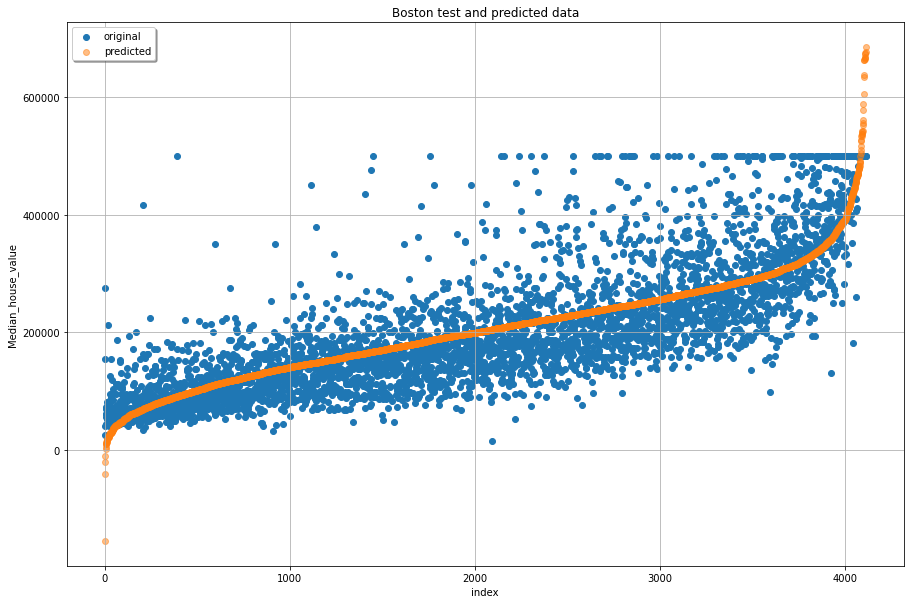

In [13]:
lr_model = lrcv
mdata = lrcvModel.transform(test_data).sort("prediction")
 
x_ax = range(0, test_data.count())
y_pred = mdata.select("prediction").collect()
y_orig = mdata.select(target).collect()

plt.figure(figsize=(15, 10))
plt.scatter(x_ax, y_orig, label="original")
plt.scatter(x_ax, y_pred, label="predicted", alpha=0.5)
plt.title("Boston test and predicted data")
plt.xlabel('index')
plt.ylabel('Median_house_value')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

In [14]:
score_table

,RMSE,MAE,R2
only_num_data,70030.53,51118.67,0.63
full_data,69050.70,50013.00,0.64


## Вывод

 В этом проекте мы постарались ответить на вопрос: Как отличаются модели линейной регрессии обучаемые на числовых признаках и модели построенные на числовых и категориальных признаках?
 
 Для начала мы инициализировали локальную spark-сессию и  загрузили данные. Затем мы ознакомились с размерами датасета, типами данных и также обнаружили пропуски в столбце `total_bedrooms` - количество спален, пропуски мы заполнили в пайплайнах посредством imputer'ра.
 Мы выделили категориальные признаки, числовые признаки и целевой показатель. При конструировании пайплайна приняли во внимание что категориальные и числовые признаки обрабатываются различно. 
 Для числовых признаков использовали схему: 
 * Импутация пропушенных значений, стратегия - медиана.
 * Асамблирование в вектор.
 * Скалирование.
 Для категоральных признаков:
 * StringIndexer
 * OneHotEncoder
 * Асамблирование в вектор.
 
 Затем сложили вектора категориальных и числовых признаков и используя поиск по параметрам вместе с кросс-валидацией обучили модели. Метрики моделей мы поместили в сводную таблицу:
 
|Data type|RMSE|MAE|R2|
|------------|----|---|--|
|only_num_data|70030.53|51118.67|0.63|
|full_data|69050.70|50013.00|0.64|


 Исходя из данных таблицы, обучение модели линейной регресии с категориальными признаками дает большую точность предсказания, разница составляет порядка 1% по метрике R2, также присутсвует уменьшение RMSE и MAE метрик на 1,5 процента.
 